In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, epochs=1000):
        # Initialize parameters
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs

        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y):
        m = y.shape[0]
        self.output_error = self.a2 - y
        self.dW2 = np.dot(self.a1.T, self.output_error) / m
        self.db2 = np.sum(self.output_error, axis=0, keepdims=True) / m
        self.hidden_error = np.dot(self.output_error, self.W2.T) * self.sigmoid_derivative(self.a1)
        self.dW1 = np.dot(X.T, self.hidden_error) / m
        self.db1 = np.sum(self.hidden_error, axis=0, keepdims=True) / m

        # Update weights and biases
        self.W1 -= self.learning_rate * self.dW1
        self.b1 -= self.learning_rate * self.db1
        self.W2 -= self.learning_rate * self.dW2
        self.b2 -= self.learning_rate * self.db2

    def train(self, X, y):
        for epoch in range(self.epochs):
            self.forward(X)
            self.backward(X, y)
            if epoch % 100 == 0:
                loss = np.mean(np.square(self.a2 - y))
                print(f'Epoch {epoch}, Loss: {loss:.4f}')

    def predict(self, X):
        predictions = self.forward(X)
        return np.argmax(predictions, axis=1)

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [6]:
input_size = X_train.shape[1]
hidden_size = 10
output_size = y_train.shape[1]
nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate=0.01, epochs=1000)
nn.train(X_train, y_train)

Epoch 0, Loss: 0.2311
Epoch 100, Loss: 0.1979
Epoch 200, Loss: 0.1831
Epoch 300, Loss: 0.1742
Epoch 400, Loss: 0.1676
Epoch 500, Loss: 0.1619
Epoch 600, Loss: 0.1568
Epoch 700, Loss: 0.1521
Epoch 800, Loss: 0.1478
Epoch 900, Loss: 0.1437


In [7]:
y_pred = nn.predict(X_test)
y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.70


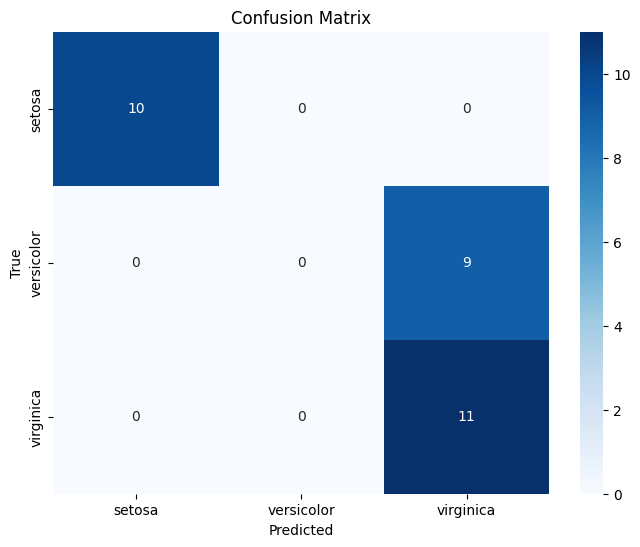

In [8]:
conf_matrix = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()